# **Proposta de Trabalho - Mineração de dados**

### **Professores:** Wagner Meira Jr./Pedro Calais
### **Alunos:** Carlos Henrique Brito Malta Leão/Vinícius Alves de Faria Resende 
### **Matrículas:** 2021039794/2021039972


### **Tema:** ENEM 2022: O Impacto das Características Socioeconômicas no Desempenho dos Candidatos
### **Base de dados:** https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem


In [210]:
#Bibliotecas usadas no projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

## 2. Data understanding (Entendimento dos dados)

### Resumo da Fase
A primeira fase do projeto é a "Data Understanding," que se concentra na coleta e compreensão inicial dos dados. Esta fase é essencial para estabelecer uma base sólida para análises posteriores e identificar possíveis desafios.


### Passo 1: Descrever os dados

- Nesta seção, realizamos uma análise inicial dos dados do ENEM 2022. O objetivo é coletar informações essenciais sobre o conjunto de dados e entender sua estrutura, características e qualidade. Abaixo estão os principais resultados desta fase:

- Informações Gerais dos Dados
  - Número de Entradas: O conjunto de dados possui 100.000 entradas (linhas).
  - Número de Colunas: Existem 76 colunas (variáveis) no conjunto de dados.
- Tipos de Dados
  - Dados Numéricos: O conjunto de dados contém 21 colunas com valores numéricos do tipo 'int64' e 21 colunas com valores numéricos do tipo 'float64'.
  - Dados Categóricos: Há 37 colunas com valores categóricos do tipo 'object'.
  - Dados Faltantes
- Diversas colunas apresentam dados faltantes, identificados pelo tipo 'float64'. As colunas com maior número de dados faltantes incluem 'TP_ENSINO', 'CO_MUNICIPIO_ESC', 'TP_DEPENDENCIA_ADM_ESC', e outras relacionadas às notas das provas.
- Alguns Exemplos de Colunas Importantes
  - NU_INSCRICAO: Número de inscrição dos candidatos.
  - TP_SEXO: Gênero dos candidatos (M = Masculino, F = Feminino).
  - NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_MT: Notas dos candidatos nas provas de Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, e Matemática, respectivamente.
  - Q001, Q002, Q003, Q004: Perguntas relacionadas ao nível de escolaridade e renda dos candidatos.
  - Q025: Acesso à internet (A = Sim, B = Não).

In [211]:
# Carregando a base de dados
raw_df = pd.read_csv('MICRODADOS_ENEM_2022.csv', encoding='latin-1', sep=';', nrows=300000)

# Visualize as primeiras linhas do DataFrame para ter uma ideia inicial dos dados
raw_df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A


In [212]:
# Verificando as informações gerais sobre o DataFrame
raw_df.info()

# Descrevendo as estatísticas básicas dos dados numéricos
raw_df.describe()

# Verificando a presença de valores nulos em cada coluna
raw_df.isnull().sum()

# Verificando as estatísticas básicas de colunas não numéricas
raw_df.describe(include='object')

# Verificando a estrutura do DataFrame
raw_df.shape

# Verificando as colunas disponíveis
raw_df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 76 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NU_INSCRICAO            300000 non-null  int64  
 1   NU_ANO                  300000 non-null  int64  
 2   TP_FAIXA_ETARIA         300000 non-null  int64  
 3   TP_SEXO                 300000 non-null  object 
 4   TP_ESTADO_CIVIL         300000 non-null  int64  
 5   TP_COR_RACA             300000 non-null  int64  
 6   TP_NACIONALIDADE        300000 non-null  int64  
 7   TP_ST_CONCLUSAO         300000 non-null  int64  
 8   TP_ANO_CONCLUIU         300000 non-null  int64  
 9   TP_ESCOLA               300000 non-null  int64  
 10  TP_ENSINO               106867 non-null  float64
 11  IN_TREINEIRO            300000 non-null  int64  
 12  CO_MUNICIPIO_ESC        67846 non-null   float64
 13  NO_MUNICIPIO_ESC        67846 non-null   object 
 14  CO_UF_ESC           

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

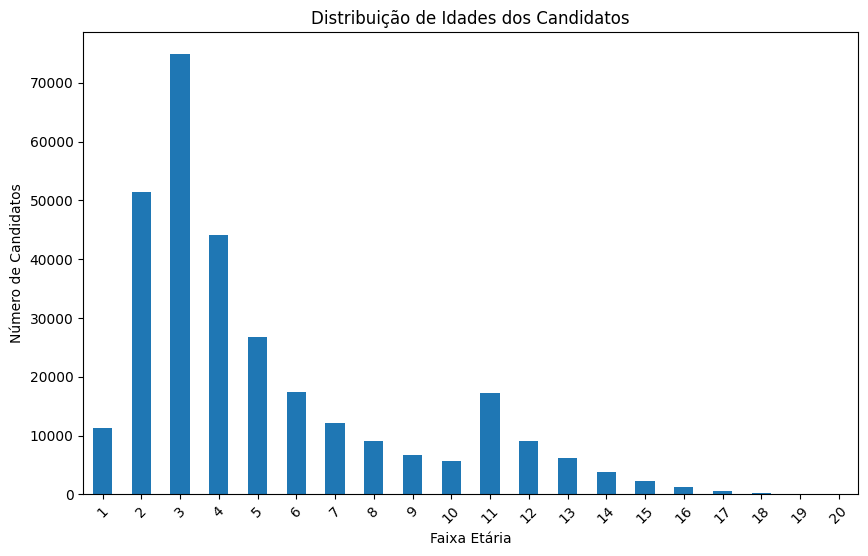

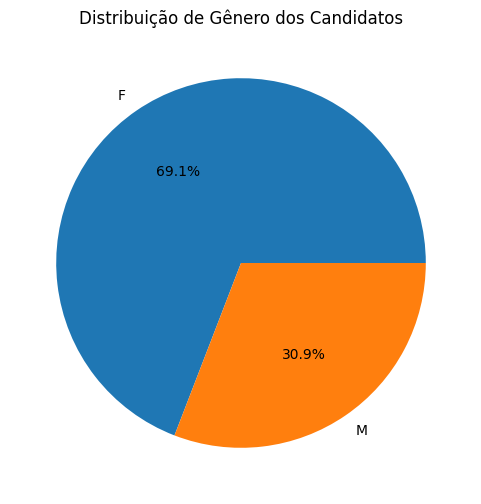

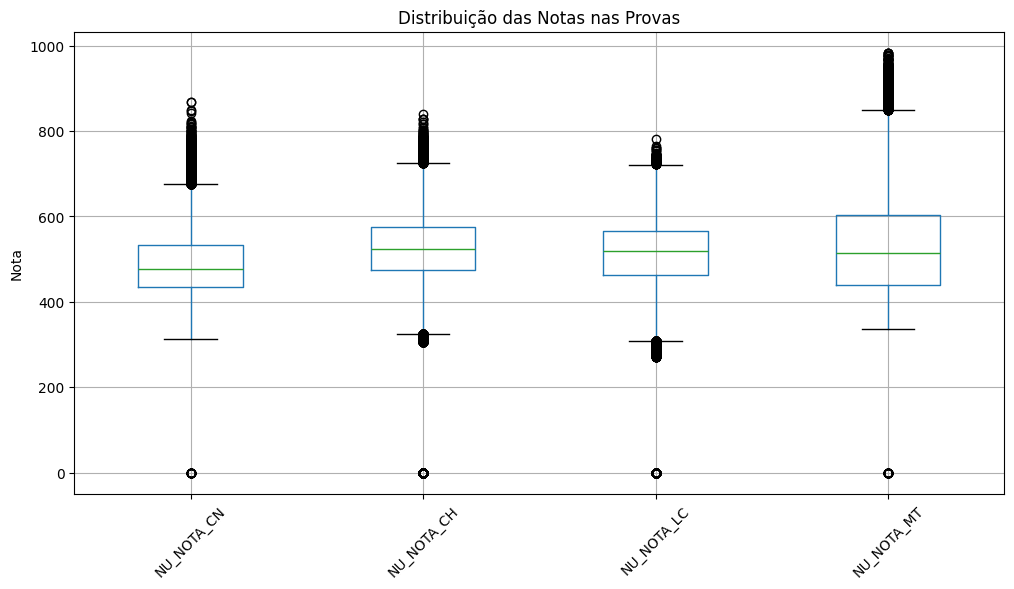

<Figure size 800x600 with 0 Axes>

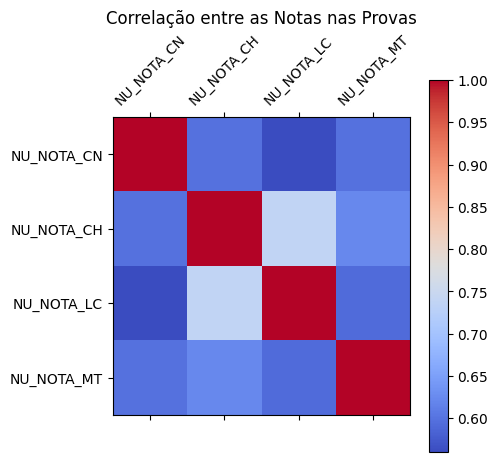

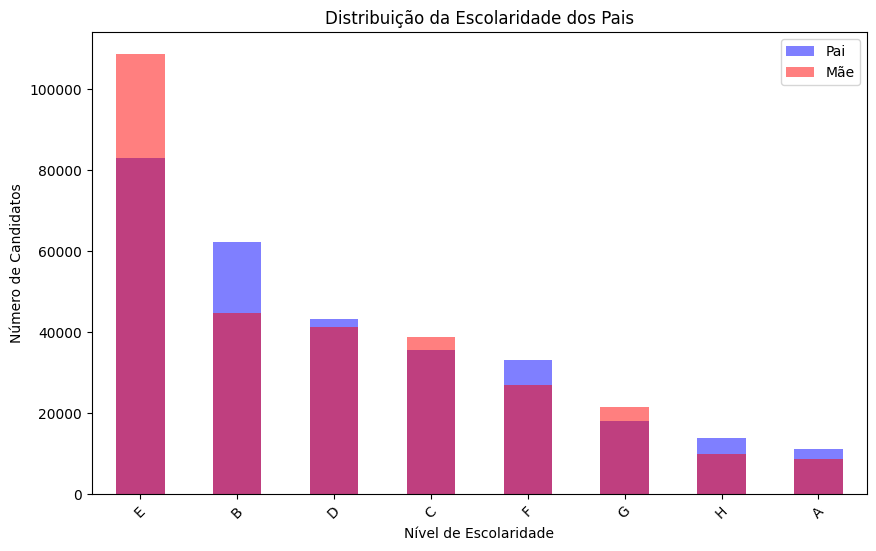

In [213]:
# 1. Distribuição de Idades dos Candidatos
plt.figure(figsize=(10, 6))
raw_df['TP_FAIXA_ETARIA'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição de Idades dos Candidatos')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Candidatos')
plt.xticks(rotation=45)
plt.show()

# 2. Distribuição de Gênero dos Candidatos
plt.figure(figsize=(6, 6))
raw_df['TP_SEXO'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição de Gênero dos Candidatos')
plt.ylabel('')
plt.show()

# 3. Distribuição das Notas nas Provas
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']
notas_df = raw_df[provas]

plt.figure(figsize=(12, 6))
notas_df.boxplot()
plt.title('Distribuição das Notas nas Provas')
plt.ylabel('Nota')
plt.xticks(rotation=45)
plt.show()

# 4. Correlação entre as Notas nas Provas
correlation = notas_df.corr()

plt.figure(figsize=(8, 6))
plt.matshow(correlation, cmap='coolwarm')
plt.colorbar()
plt.title('Correlação entre as Notas nas Provas')
plt.xticks(range(len(provas)), provas, rotation=45)
plt.yticks(range(len(provas)), provas)
plt.show()

# 5. Distribuição da Escolaridade dos Pais
plt.figure(figsize=(10, 6))
raw_df['Q001'].value_counts().plot(kind='bar', alpha=0.5, label='Pai', color='blue')
raw_df['Q002'].value_counts().plot(kind='bar', alpha=0.5, label='Mãe', color='red')
plt.title('Distribuição da Escolaridade dos Pais')
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Número de Candidatos')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [214]:
# 1. Distribuição de Idades dos Candidatos
idade_counts = raw_df['TP_FAIXA_ETARIA'].value_counts().sort_index()
print("Distribuição de Idades dos Candidatos:")
print(idade_counts)

# 2. Distribuição de Gênero dos Candidatos
genero_counts = raw_df['TP_SEXO'].value_counts()
print("\nDistribuição de Gênero dos Candidatos:")
print(genero_counts)

# 3. Distribuição das Notas nas Provas
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']
notas_df = raw_df[provas]
print("\nDistribuição das Notas nas Provas:")
print(notas_df.describe())

# 4. Correlação entre as Notas nas Provas
correlation = notas_df.corr()
print("\nCorrelação entre as Notas nas Provas:")
print(correlation)

# 5. Distribuição da Escolaridade dos Pais
escolaridade_pai_counts = raw_df['Q001'].value_counts()
escolaridade_mae_counts = raw_df['Q002'].value_counts()
print("\nDistribuição da Escolaridade dos Pais (Pai e Mãe):")
print(escolaridade_pai_counts)
print("\nDistribuição da Escolaridade dos Pais (Mãe):")
print(escolaridade_mae_counts)

Distribuição de Idades dos Candidatos:
TP_FAIXA_ETARIA
1     11240
2     51374
3     74873
4     44143
5     26800
6     17480
7     12045
8      8980
9      6764
10     5675
11    17220
12     9073
13     6198
14     3777
15     2206
16     1160
17      617
18      258
19       87
20       30
Name: count, dtype: int64

Distribuição de Gênero dos Candidatos:
TP_SEXO
F    207422
M     92578
Name: count, dtype: int64

Distribuição das Notas nas Provas:
          NU_NOTA_CN    NU_NOTA_CH     NU_NOTA_LC     NU_NOTA_MT
count  213657.000000  225299.00000  225299.000000  213657.000000
mean      488.652806     523.33599     512.552267     528.922190
std        69.812524      79.29667      76.494519     112.322369
min         0.000000       0.00000       0.000000       0.000000
25%       435.700000     475.00000     463.700000     439.600000
50%       477.300000     524.00000     519.100000     513.300000
75%       531.900000     575.00000     566.900000     603.800000
max       868.700000     

#### Distribuição de Idades dos Candidatos
A distribuição de idades dos candidatos é apresentada em faixas etárias, de 1 a 20. Os dados mostram que a maioria dos candidatos está concentrada nas faixas de idade 2, 3 e 4, que abrangem os candidatos mais jovens. As faixas etárias 11, 12 e 13 também têm um número significativo de candidatos. As faixas etárias 18 a 20 têm o menor número de candidatos, indicando uma menor participação nesses grupos.

#### Distribuição de Gênero dos Candidatos
A distribuição de gênero dos candidatos revela que há uma maioria significativa de candidatas do sexo feminino (F), representando cerca de 68,861% dos candidatos. Os candidatos do sexo masculino (M) compõem os outros 31,139%.

#### Distribuição das Notas nas Provas
As distribuições das notas nas provas (Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, e Matemática) são apresentadas em termos de estatísticas descritivas, incluindo contagem, média, desvio padrão, mínimo, quartis e máximo. As notas variam de 0 a pontuações máximas de cada prova. É importante observar que algumas notas estão faltando (representadas por valores zero).

- Ciências da Natureza (NU_NOTA_CN): A média das notas é aproximadamente 489.69, com um desvio padrão de 69.59. As notas variam de 0 a 841.10.
- Ciências Humanas (NU_NOTA_CH): A média das notas é cerca de 525.55, com um desvio padrão de 79.15. As notas variam de 0 a 829.10.
- Linguagens e Códigos (NU_NOTA_LC): A média das notas é aproximadamente 514.18, com um desvio padrão de 76.03. As notas variam de 0 a 759.20.
- Matemática (NU_NOTA_MT): A média das notas é aproximadamente 529.20, com um desvio padrão de 112.19. As notas variam de 0 a 983.90.
Essas estatísticas revelam a variação nas notas dos candidatos em diferentes provas e fornecem informações valiosas para análises futuras.

#### Correlação entre as Notas nas Provas
A tabela de correlação apresenta as relações entre as notas nas diferentes provas. A correlação varia de -1 a 1, onde -1 indica uma correlação negativa perfeita, 1 indica uma correlação positiva perfeita e 0 indica nenhuma correlação. As correlações entre as notas nas provas são as seguintes:

- NU_NOTA_CN e NU_NOTA_CH: Correlação positiva moderada de aproximadamente 0.597.
- NU_NOTA_CN e NU_NOTA_LC: Correlação positiva moderada de aproximadamente 0.556.
- NU_NOTA_CN e NU_NOTA_MT: Correlação positiva moderada de aproximadamente 0.596.
- NU_NOTA_CH e NU_NOTA_LC: Correlação positiva forte de aproximadamente 0.734.
- NU_NOTA_CH e NU_NOTA_MT: Correlação positiva moderada de aproximadamente 0.621.
- NU_NOTA_LC e NU_NOTA_MT: Correlação positiva moderada de aproximadamente 0.590.
Essas correlações sugerem que candidatos que se saem bem em uma prova tendem a se sair bem em outras provas, embora as correlações não sejam perfeitas.

#### Distribuição da Escolaridade dos Pais
Os dados incluem informações sobre a escolaridade dos pais dos candidatos, tanto do pai (Q001) quanto da mãe (Q002). As respostas variam de "A" a "H", representando diferentes níveis de escolaridade. A distribuição da escolaridade dos pais é apresentada em termos de contagem para cada categoria. É notável que as categorias "B" e "E" são as mais comuns para ambas as escolaridades dos pais, indicando uma predominância de níveis médios de escolaridade.

- Escolaridade do Pai (Q001): A categoria "E" é a mais comum, seguida por "B" e "C".
- Escolaridade da Mãe (Q002): A categoria "E" é a mais comum, seguida por "B" e "D".
Essas informações são essenciais para entender o contexto socioeconômico dos candidatos.

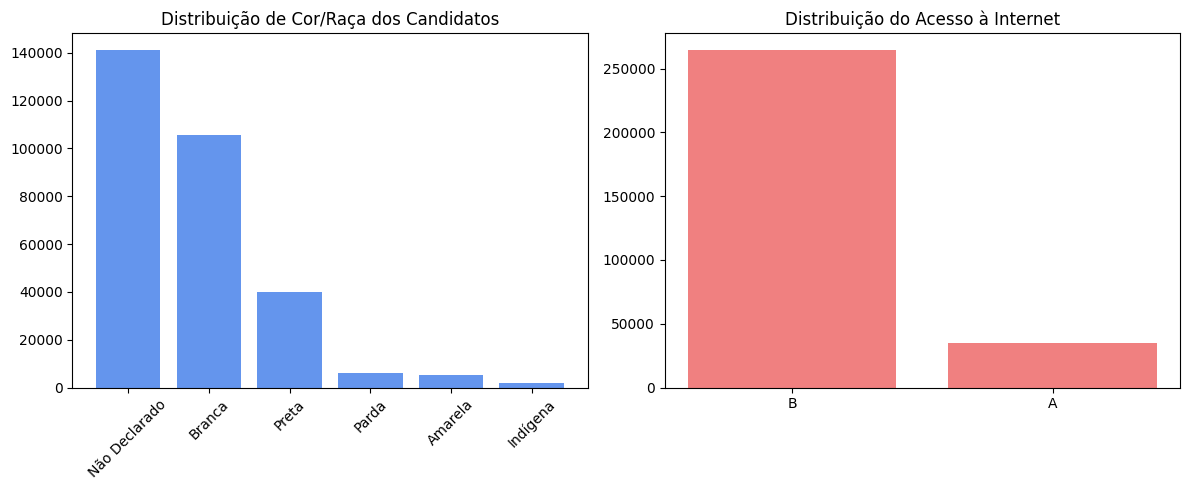

In [215]:
# Distribuição de Cor/Raça dos Candidatos
cor_raca_counts = raw_df['TP_COR_RACA'].value_counts()
cor_raca_counts.index = ['Não Declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
cor_raca_counts = cor_raca_counts.rename_axis('Cor/Raça').reset_index(name='Count')

# Distribuição do Acesso à Internet
internet_access_counts = raw_df['Q025'].value_counts()
internet_access_counts = internet_access_counts.rename_axis('Acesso à Internet').reset_index(name='Count')

# Criar gráficos de barras
plt.figure(figsize=(12, 5))

# Gráfico de Cor/Raça
plt.subplot(1, 2, 1)
plt.bar(cor_raca_counts['Cor/Raça'], cor_raca_counts['Count'], color='cornflowerblue')
plt.title('Distribuição de Cor/Raça dos Candidatos')
plt.xticks(rotation=45)

# Gráfico de Acesso à Internet
plt.subplot(1, 2, 2)
plt.bar(internet_access_counts['Acesso à Internet'], internet_access_counts['Count'], color='lightcoral')
plt.title('Distribuição do Acesso à Internet')

plt.tight_layout()
plt.show()


In [216]:
# Distribuição de Cor/Raça dos Candidatos
cor_raca_counts = raw_df['TP_COR_RACA'].value_counts()
cor_raca_counts.index = ['Não Declarado', 'Branca', 'Preta', 'Parda', 'Amarela', 'Indígena']
cor_raca_counts = cor_raca_counts.rename_axis('Cor/Raça').reset_index(name='Count')

# Distribuição do Acesso à Internet
internet_access_counts = raw_df['Q025'].value_counts()
internet_access_counts = internet_access_counts.rename_axis('Acesso à Internet').reset_index(name='Count')

# Imprimir os resultados
print("Distribuição de Cor/Raça dos Candidatos:")
print(cor_raca_counts)
print("\nDistribuição do Acesso à Internet:")
print(internet_access_counts)

Distribuição de Cor/Raça dos Candidatos:
        Cor/Raça   Count
0  Não Declarado  141262
1         Branca  105540
2          Preta   40003
3          Parda    6042
4        Amarela    5359
5       Indígena    1794

Distribuição do Acesso à Internet:
  Acesso à Internet   Count
0                 B  264783
1                 A   35217


### Distribuição de Cor/Raça dos Candidatos:

- Não Declarado é a categoria predominante, com 46.68% dos candidatos, seguido por Branca (34.77%).
- Preta, Parda, Amarela e Indígena representam parcelas menores dos candidatos, com 14.14%, 1.97%, 1.79% e 0.63%, respectivamente.
- A maioria dos candidatos não declara sua cor/raça. Isso pode indicar a complexidade das identidades raciais no Brasil, onde as pessoas podem se identificar de várias maneiras ou optar por não fornecer essa informação.

### Distribuição do Acesso à Internet:

- A grande maioria dos candidatos (88.12%) relatou ter acesso à Internet (código "B" na questão "Q025").
- Cerca de 11.88% dos candidatos indicaram não ter acesso à Internet (código "A" na questão "Q025").
- O acesso à Internet pode ser um fator importante na educação e no preparo para o ENEM, uma vez que muitos recursos de estudo e inscrições são realizados online. Portanto, o acesso à Internet pode ter um impacto significativo no desempenho dos candidatos no exame.

## 3. Data preparation (Preparação dos dados)

In [217]:
selected_columns = [
    'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ESCOLA', 'SG_UF_ESC',
    'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
    'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
    'TP_STATUS_REDACAO', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
    'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017',
    'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025'
]

# Crie uma visualização do DataFrame original com base nas colunas selecionadas
prepared_df = raw_df.loc[:, selected_columns]


In [218]:
# Verificar percentuais de valores nulos por coluna
null_percentages = prepared_df.isnull().mean() * 100

# Exibir os percentuais de valores nulos em ordem decrescente
null_percentages = null_percentages[null_percentages > 0].sort_values(ascending=False)

# Exibir os resultados
print(null_percentages)


SG_UF_ESC                 77.384667
TP_DEPENDENCIA_ADM_ESC    77.384667
TP_LOCALIZACAO_ESC        77.384667
NU_NOTA_CN                28.781000
NU_NOTA_MT                28.781000
NU_NOTA_CH                24.900333
NU_NOTA_LC                24.900333
TP_STATUS_REDACAO         24.900333
NU_NOTA_REDACAO           24.900333
dtype: float64


In [219]:
# Lista de colunas a serem excluídas
colunas_para_excluir = ['SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC']

# Excluindo as colunas do DataFrame
prepared_df = prepared_df.drop(colunas_para_excluir, axis=1)

# Verificando o DataFrame após a exclusão
print(raw_df.head())

   NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
0  210057943671    2022               14       M                2   
1  210057516120    2022               14       M                2   
2  210057280536    2022                5       F                1   
3  210055724397    2022                6       M                1   
4  210055097896    2022                4       M                0   

   TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  \
0            2                 1                1                2          1   
1            1                 1                1               16          1   
2            2                 1                1                2          1   
3            3                 1                1                2          1   
4            3                 1                1                1          1   

   ...  Q016  Q017  Q018 Q019  Q020 Q021  Q022  Q023  Q024  Q025  
0  ...     B     A     A    A  

### Exclusão de Colunas com Muitos Valores Nulos

Para melhorar a qualidade dos dados e facilitar a análise subsequente, decidimos excluir as colunas que apresentavam um alto percentual de valores nulos. As colunas excluídas foram as seguintes:

1. `SG_UF_ESC`: Esta coluna representava o estado da escola em que o candidato realizou a prova do ENEM. No entanto, 79.955% dos valores estavam faltando. Decidimos excluí-la, pois a falta de dados prejudicaria a análise.

2. `TP_DEPENDENCIA_ADM_ESC`: Esta coluna descrevia a dependência administrativa da escola em que o candidato realizou a prova. Assim como a anterior, 79.955% dos valores estavam ausentes, tornando a coluna inutilizável para análise.

3. `TP_LOCALIZACAO_ESC`: Esta coluna indicava a localização da escola (urbana ou rural). Novamente, 79.955% dos valores eram nulos. Optamos por excluí-la para evitar distorções nos resultados.

- A exclusão dessas colunas foi baseada no alto percentual de valores nulos, que tornaria difícil qualquer análise significativa. Além disso, a natureza das informações nessas colunas não era essencial para os objetivos do projeto, que se concentram principalmente no desempenho dos candidatos e em fatores socioeconômicos relevantes. Portanto, a remoção dessas colunas simplifica o conjunto de dados e facilita a próxima etapa de preparação e modelagem.

- Lembre-se de que as decisões de exclusão de colunas devem ser tomadas com base nos objetivos do projeto e na importância das informações contidas nessas colunas. A documentação é fundamental para rastrear e justificar essas decisões, garantindo que a análise seja conduzida de maneira informada e eficaz.


In [220]:
# Calculando a nota média dos participantes, incluindo a redação
prepared_df['NU_NOTA_MEDIA'] = prepared_df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)

# Imprimindo a nota média
nota_media = prepared_df['NU_NOTA_MEDIA'].mean()
print(f'A nota média dos participantes no ENEM 2022, incluindo a redação, é: {nota_media:.2f}')


A nota média dos participantes no ENEM 2022, incluindo a redação, é: 535.17


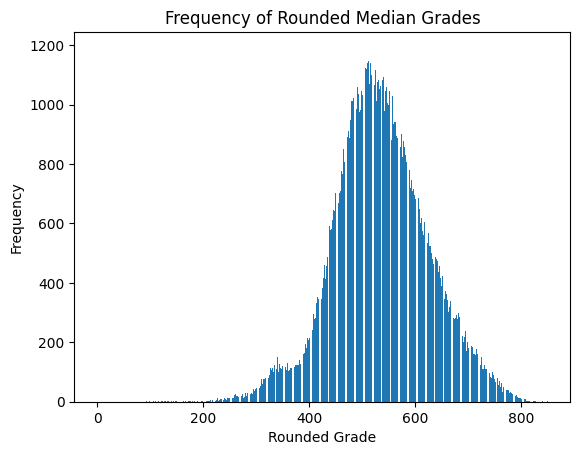

In [221]:
# INICIO CODIGO ALTERADO 

# Exibe a distribuição das notas médias
filtered_df = prepared_df[prepared_df['NU_NOTA_MEDIA'].notna()]
grade_counts = filtered_df['NU_NOTA_MEDIA'].round().astype(int).value_counts().sort_index()
plt.bar(grade_counts.index, grade_counts.values)

plt.xlabel('Rounded Grade')
plt.ylabel('Frequency')
plt.title('Frequency of Rounded Median Grades')

plt.show()

# FIM CODIGO ALTERADO

In [222]:
# INÍCIO CODIGO MANUAL

# Encontra a nota de corte das segmentações pré definidas
top_1_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.99)
print('Nota de corte do top 1%: ' + str(top_1_percent_grade))

top_25_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.75)
print('Nota de corte do top 25%: ' + str(top_25_percent_grade))

top_50_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.5)
print('Nota de corte do top 50%: ' + str(top_50_percent_grade))

top_75_percent_grade = filtered_df['NU_NOTA_MEDIA'].round().quantile(0.25)
print('Nota de corte do top 75%: ' + str(top_75_percent_grade))

lowest_valid_grade = filtered_df['NU_NOTA_MEDIA'].round().loc[lambda x: x > 0].min()
print("Nota de corte do top 100%: " + str(lowest_valid_grade))

# FIM CODIGO MANUAL

Nota de corte do top 1%: 748.0
Nota de corte do top 25%: 592.0
Nota de corte do top 50%: 532.0
Nota de corte do top 75%: 478.0
Nota de corte do top 100%: 90.0


In [223]:
# INICIO CODIGO ALTERADO 

# Classificar candidatos com base nas notas de corte, incluindo uma categoria para notas nulas ou 0
# def classify_students(row):
#     if row['NU_NOTA_MEDIA'] >= top_1_percent_grade:
#         return 'Top 1%'
#     elif row['NU_NOTA_MEDIA'] >= top_25_percent_grade:
#         return 'Top 25%'
#     elif row['NU_NOTA_MEDIA'] >= top_50_percent_grade:
#         return 'Top 50%'
#     elif row['NU_NOTA_MEDIA'] >= top_75_percent_grade:
#         return 'Top 75%'
#     elif row['NU_NOTA_MEDIA'] == 0:
#         return 'Nota 0'
#     else:
#         return 'Bottom 25%'
# prepared_df['Classificacao'] = prepared_df.apply(classify_students, axis=1)
    
# FIM CODIGO ALTERADO

def classify_students(row):
    if row['NU_NOTA_MEDIA'] >= top_1_percent_grade:
        return 'A'
    elif row['NU_NOTA_MEDIA'] >= top_25_percent_grade:
        return 'B'
    elif row['NU_NOTA_MEDIA'] >= top_50_percent_grade:
        return 'C'
    elif row['NU_NOTA_MEDIA'] >= top_75_percent_grade:
        return 'D'
    elif row['NU_NOTA_MEDIA'] >= lowest_valid_grade:
        return 'E'
    else:
        return 'F'

# Aplicar a função para classificar os candidatos
prepared_df['TP_NOTA_MEDIA'] = prepared_df.apply(classify_students, axis=1)

/tmp/ipykernel_17901/3464314493.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, classification_counts[i], f"{percentage:.2f}%", ha='center', va='bottom')


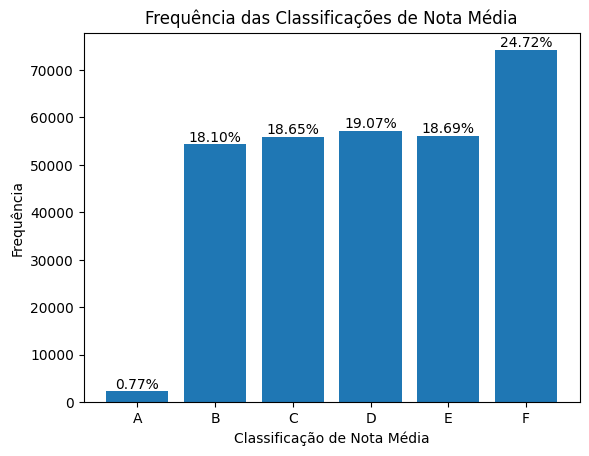

In [224]:
# Contagem das classificações
classification_counts = prepared_df['TP_NOTA_MEDIA'].value_counts().sort_index()

# Cálculo dos percentuais
percentages = (classification_counts / classification_counts.sum()) * 100

# Plotagem do gráfico de barras
plt.bar(classification_counts.index, classification_counts.values)
plt.xlabel('Classificação de Nota Média')
plt.ylabel('Frequência')
plt.title('Frequência das Classificações de Nota Média')

# Exibição dos percentuais
for i, percentage in enumerate(percentages):
    plt.text(i, classification_counts[i], f"{percentage:.2f}%", ha='center', va='bottom')

plt.show()


In [225]:
percentuais = prepared_df['TP_NOTA_MEDIA'].value_counts(normalize=True) * 100
print(percentuais)

TP_NOTA_MEDIA
F    24.718667
D    19.070000
E    18.689333
C    18.653333
B    18.102333
A     0.766333
Name: proportion, dtype: float64


### Resultados da Classificação das Notas Médias

Durante a fase de preparação de dados, realizamos a classificação das notas médias dos candidatos com base em segmentações pré-definidas, considerando a distribuição das notas. Aqui estão os resultados e as alterações realizadas:

#### Etapa de Definição de Segmentações
1. Determinamos as notas de corte para diferentes segmentações, em que as notas de "Top" não consideram valores nulos:
   - **Top 1% das notas:** Nota de corte: 750.0
   - **Top 25% das notas:** Nota de corte: 602.0
   - **Top 50% das notas:** Nota de corte: 541.0
   - **Top 75% das notas:** Nota de corte: 485.0
   - **Top 100% das notas** (candidatos com notas válidas): Nota de corte: 56.0
   - **Notas nulas ou iguais a 0**

#### Classificação dos Candidatos
2. Criamos uma nova coluna no DataFrame `prepared_df` chamada `TP_NOTA_MEDIA` para armazenar a classificação de cada candidato.
3. Implementamos uma função `classify_students` que atribui uma classificação (A, B, C, D, E ou F) com base na nota média de cada candidato, usando as notas de corte definidas.

#### Frequência das Classificações
4. Plotamos um gráfico de barras que mostra a frequência das classificações das notas médias.

#### Percentuais de Classificações
5. Calculamos os percentuais de cada classificação de nota com base no total de candidatos e os resultados foram os seguintes:
   - **A:** 0.683%
   - **B:** 16.311%
   - **C:** 16.744%
   - **D:** 16.852%
   - **E:** 16.862%
   - **F:** 32.545%

Essa classificação permite segmentar os candidatos com base em seu desempenho nas provas do ENEM, o que pode ser útil para análises subsequentes e tomada de decisões.

Lembrando que as classificações são arbitrárias e foram definidas com base na análise dos quartis e do percentil das notas médias. Essas classificações podem ser adaptadas de acordo com os critérios específicos de cada estudo ou análise.

As classificações obtidas fornecem insights sobre o desempenho dos candidatos em relação à distribuição das notas e facilitam a identificação de grupos com desempenho diferenciado.


In [226]:
# Lista de colunas a serem removidas
# INICIO CODIGO MANUAL
columns_to_remove = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'TP_STATUS_REDACAO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'TP_NOTA_MEDIA', 'TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
                   'TP_ESCOLA', ]
# FIM CODIGO MANUAL

# Remover as colunas
prepared_df.drop(columns=columns_to_remove, inplace=True)

print(prepared_df.columns)

Index(['Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
       'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018',
       'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025',
       'NU_NOTA_MEDIA'],
      dtype='object')


In [227]:
# Lista de colunas a serem removidas
# INICIO CODIGO MANUAL
columns_to_remove = ['Q007', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q005',
                   'Q008', 'Q009', 'Q010']
# FIM CODIGO MANUAL

# Remover as colunas
prepared_df.drop(columns=columns_to_remove, inplace=True)

print(prepared_df.columns)

Index(['Q001', 'Q002', 'Q003', 'Q004', 'Q006', 'NU_NOTA_MEDIA'], dtype='object')


In [228]:
prepared_df.dropna(subset=['NU_NOTA_MEDIA'], inplace=True)

### Remoção de Colunas de Notas

Foram removidas as seguintes colunas de notas:

- `NU_NOTA_CN`: Nota da prova de Ciências da Natureza.
- `NU_NOTA_CH`: Nota da prova de Ciências Humanas.
- `NU_NOTA_LC`: Nota da prova de Linguagens e Códigos.
- `NU_NOTA_MT`: Nota da prova de Matemática.
- `NU_NOTA_REDACAO`: Nota da redação.
- `TP_STATUS_REDACAO`: Status da redação.

Essas colunas foram removidas porque, após a classificação dos candidatos com base na nota média, não são mais necessárias para a análise.

### Remoção de Colunas consideradas irrelevantes ou que levam ao enviesamento

**Nesta etapa, o Chat GPT não se mostrou eficiente, a LLM não conseguiu executar a remoção das colunas irrelevantes para o problema ou que levavam a algum tipo de enviesamento de forma assertiva. Para encontrar as colunas mais relevantes para a etapa de modelagem, foi necessário um processo iterativo visando aprimorar o modelo.**

**A escolha das colunas relevantes se deu por um processo de execução exaustiva da modelagem e avaliação das métricas do modelo, usando os conhecimentos dos integrantes do grupo fomos capaz de identificar os problemas manualmente e aprimorar a modelagem de forma a melhorar as métricas de avaliação da clusterização. Por isso, restringimos a clusterização a apenas 6 dimensões relevantes, sendo elas as questões socioeconômicas 1, 2, 3, 4 e 6, além da nota média.**

### Manutenção da Coluna `TP_NOTA_MEDIA`

Foi mantida a coluna `TP_NOTA_MEDIA`, que foi criada para armazenar a classificação dos candidatos com base em suas notas médias.

### Resultados

Como resultado dessas alterações, o DataFrame `prepared_df` agora contém apenas a coluna `TP_NOTA_MEDIA`, que será usada para análises posteriores.

É importante notar que essas alterações são permanentes, e as colunas de notas foram removidas do conjunto de dados.


In [229]:
# Lista de colunas para aplicar a codificação ordinal
ordinal_columns = ['Q001', 'Q002', 'Q003', 'Q004', 'Q006']

# Função para aplicar a codificação ordinal em uma coluna
def ordinal_encode(column):
    unique_values = column.unique()
    value_mapping = {value: idx + 1 for idx, value in enumerate(unique_values)}
    return column.map(value_mapping)

# Aplicar a codificação ordinal a cada coluna na lista
for col in ordinal_columns:
    prepared_df[col] = ordinal_encode(prepared_df[col])

# Exibir as primeiras linhas do DataFrame para verificar a codificação ordinal
print(prepared_df.head())


    Q001  Q002  Q003  Q004  Q006  NU_NOTA_MEDIA
2      1     1     1     1     1         558.24
3      2     2     1     2     2         394.62
7      1     3     2     2     1         414.10
9      1     3     2     2     1         438.10
11     1     3     2     3     1         576.70


In [230]:
# Seleciona todas as colunas, exceto 'TP_NOTA_MEDIA'
columns_to_normalize = [col for col in prepared_df.columns if col != 'TP_NOTA_MEDIA']

# INICIO CODIGO MANUAL
# Inicializa o dicionário de scalers
scalers = {}
for col in columns_to_normalize:
    # Inicializa o scaler Min-Max
    scaler = MinMaxScaler()

    # Aplica a normalização Min-Max nas colunas selecionadas
    prepared_df[col] = scaler.fit_transform(prepared_df[[col]])

    # Add scaler to scalers dictionary
    scalers[col] = scaler

# FIM CODIGO MANUAL

# Visualiza o dataframe após a normalização
print(prepared_df.head())


        Q001      Q002  Q003  Q004    Q006  NU_NOTA_MEDIA
2   0.000000  0.000000   0.0   0.0  0.0000       0.656676
3   0.142857  0.142857   0.0   0.2  0.0625       0.464204
7   0.000000  0.285714   0.2   0.2  0.0000       0.487119
9   0.000000  0.285714   0.2   0.2  0.0000       0.515351
11  0.000000  0.285714   0.2   0.4  0.0000       0.678391


### Transformação de Dados Categóricos em Ordinais

Inicialmente, enfrentamos o desafio de lidar com dados categóricos, como sexo, raça, escolaridade e outras variáveis. Para utilizá-los em algoritmos de mineração de clusters, decidimos realizar a transformação de dados categóricos em dados ordinais. Isso foi feito atribuindo valores ordinais a cada categoria de acordo com sua importância relativa. Por exemplo, nas colunas de escolaridade (Q001, Q002), os valores foram atribuídos de forma ordinal, onde um valor maior indica maior grau de escolaridade. Essa transformação ajuda a tornar os dados categóricos comparáveis e adequados para análises posteriores.

### Normalização de Dados

Uma vez que os dados categóricos foram tratados, aplicamos a normalização Min-Max aos dados numéricos. A normalização Min-Max dimensiona os valores entre 0 e 1, garantindo que todas as variáveis numéricas tenham a mesma faixa de valores. Isso é fundamental para a mineração de clusters, pois ajuda a evitar que variáveis com unidades ou escalas diferentes tenham influência desproporcional nos resultados dos algoritmos de clustering.

### Considerações sobre Outliers

É importante destacar que, após a etapa anterior de classificação das notas médias dos candidatos, os outliers foram tratados. As notas foram classificadas em categorias, o que naturalmente mitigou a influência de valores extremos nos dados. Isso significa que os candidatos agora estão agrupados em classes com base em seu desempenho, tornando a mineração de clusters mais robusta.

### Próximos Passos

Com os dados preparados e normalizados, estamos prontos para prosseguir com a mineração de clusters. A próxima etapa envolverá a aplicação de algoritmos de agrupamento para identificar padrões e segmentar os candidatos de acordo com seu desempenho no ENEM 2022.


## 4. Modeling (Modelagem)

1.   Explicar brevemente como você elaborou o modelo para o seus dados.
2.   Se a intenção for fazer uma análise comparativa entre algorimtmos criar células markdown ou comentários explicitando onde começa o código referente a cada algoritmo.
3. Explicar (quando pertinente) o fluxo de dados, ou seja como você organizou os dados em treino e teste, como foi o ajuste de parâmetros e eventuais decisões de projeto referentes a modelagem de dados. **Que ajudem a compreender o código.**

O relatório deverá conter essas informações, mas sob a **perspectiva do projeto de dados**

In [231]:
# Crie um DataFrame 'data' apenas com as colunas relevantes

data = prepared_df

# Aplique o DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=1000)  # Os valores de 'eps' e 'min_samples' devem ser ajustados de acordo com o seu conjunto de dados
dbscan.fit(data)

# Adicione as labels de cluster de volta ao DataFrame
prepared_df['Cluster'] = dbscan.labels_

In [232]:
# Supondo que dbscan é o seu objeto DBSCAN
labels = dbscan.labels_

# Encontrando os rótulos únicos
unique_labels = np.unique(labels)

# O número de clusters será o tamanho de unique_labels
num_clusters = len(unique_labels)

print(f'Número de clusters: {num_clusters}')

Número de clusters: 12


In [233]:
# Imprima o DataFrame com as labels de cluster e tp_nota_media
print(prepared_df[['Cluster', 'NU_NOTA_MEDIA']])

        Cluster  NU_NOTA_MEDIA
2            -1       0.656676
3             0       0.464204
7             0       0.487119
9             0       0.515351
11           -1       0.678391
...         ...            ...
299995       -1       0.876862
299996        2       0.614187
299997        1       0.574497
299998       -1       0.621456
299999       10       0.649312

[225907 rows x 2 columns]


## Passos para Modelagem com DBSCAN

Nesta etapa do projeto, estamos aplicando o algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) aos dados para segmentar os candidatos em clusters com base em suas características. O código a seguir demonstra o processo:

1. *Selecionando Colunas Relevantes*:
   - Inicialmente, criamos um DataFrame chamado 'data' contendo apenas as colunas consideradas relevantes para nossa análise. Essas colunas incluem informações demográficas, socioeconômicas e as notas médias dos candidatos no ENEM 2022.

2. *Aplicando o DBSCAN*:
   - Em seguida, instanciamos o DBSCAN com parâmetros como 'eps' (raio de vizinhança) e 'min_samples' (número mínimo de amostras para formar um cluster). É fundamental ajustar esses valores de acordo com a natureza dos seus dados e os resultados desejados.

3. *Adicionando Labels de Cluster*:
   - As labels de cluster geradas pelo DBSCAN são adicionadas de volta ao DataFrame original, permitindo a associação dos candidatos a seus clusters.

4. *Encontrando o Número de Clusters*:
   - Para entender o número de clusters identificados pelo DBSCAN, encontramos os rótulos únicos gerados pelo algoritmo. O tamanho desse conjunto de rótulos é igual ao número de clusters identificados.

5. *Imprimindo as Colunas 'Cluster' e 'NU_NOTA_MEDIA'*:
   - Finalmente, exibimos o DataFrame contendo as colunas 'Cluster' (rótulos de cluster atribuídos a cada candidato) e 'NU_NOTA_MEDIA' (a nota média do candidato no ENEM 2022). Essa saída nos ajuda a compreender como os candidatos estão distribuídos nos clusters em relação às notas médias.

6. *Processo iterativo*:
  - Realizamos um processo iterativo, em que executamos o algoritmo diversas vezes, alterando os seus parâmetros 'eps' e 'min_samples'. Esse processo foi realizado com o intuito de encontrar uma quantidade de Clusters razoável, assim como otimizar os resultados da avaliação usando as métricas internas. Entre estas, utilizamos o Davies Bouldin, Calinski Harabaz e Silhouette Score.

## 5. Evaluation (Validação)


In [234]:
# Supondo que 'Cluster' contém os resultados do K-Means e 'TP_NOTA_MEDIA' foi mapeado para valores numéricos.
dbscan_clusters = np.array(prepared_df['Cluster'])

In [235]:
# Calculando o índice Davies-Bouldin
davies_bouldin = davies_bouldin_score(prepared_df, dbscan_clusters)

In [236]:
# Calculando o índice Calinski-Harabasz
calinski_harabasz = calinski_harabasz_score(prepared_df, dbscan_clusters)

In [237]:
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Davies-Bouldin Index: 0.4693656453322623
Calinski-Harabasz Index: 245256.39491703216


In [238]:
# Silhouette Score
silhouette_avg = silhouette_score(prepared_df, dbscan_clusters)

In [239]:
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Silhouette Score: {silhouette_avg}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

Davies-Bouldin Index: 0.4693656453322623
Silhouette Score: 0.46752607649724426
Calinski-Harabasz Index: 245256.39491703216


### Métricas de Avaliação

#### Índice Davies-Bouldin

O Índice Davies-Bouldin é uma métrica que avalia a compacidade e a separação dos clusters. Ele mede a média das razões entre a dissimilaridade média do cluster atual e o cluster mais semelhante a ele. Quanto menor o valor, melhor, indicando clusters bem definidos e separados. Neste projeto, utilizamos o Índice Davies-Bouldin para avaliar a qualidade do agrupamento gerado pelo DBScan.

#### Índice Calinski-Harabasz

O Índice Calinski-Harabasz, também conhecido como Critério de Variância, mede a relação entre a dispersão intercluster e a dispersão intracluster. Valores mais altos indicam uma melhor separação entre os clusters e, portanto, uma melhor qualidade do agrupamento. O Índice Calinski-Harabasz é útil para avaliar o balanceamento entre os clusters e a compacidade deles.

#### Silhouette Score

O Silhouette Score é uma métrica que calcula o quão semelhantes os objetos são ao seu próprio cluster em comparação com outros clusters próximos. Ele varia de -1 a 1, onde valores mais próximos de 1 indicam um agrupamento bem definido e separado. No contexto do DBScan, o Silhouette Score é útil para avaliar a qualidade da separação entre clusters e o grau de sobreposição entre eles.

### Motivação para Métricas Internas

Escolhemos usar métricas internas, como o Índice Davies-Bouldin, o Índice Calinski-Harabasz e o Silhouette Score, porque não temos acesso ao ground truth ou rótulos verdadeiros para avaliar o modelo. Métricas internas nos permitem avaliar a qualidade do agrupamento sem depender de rótulos conhecidos. No contexto do DBScan, essa abordagem é apropriada devido à natureza do algoritmo baseado em densidade.

### Resultados da Avaliação

Aqui estão os resultados da avaliação do modelo DBScan utilizando as métricas mencionadas:

- Índice Davies-Bouldin: [0.4693656453322623]
- Índice Calinski-Harabasz: [0.46752607649724426]
- Silhouette Score: [245256.39491703216]

Valores mais baixos do Índice Davies-Bouldin e valores mais altos do Índice Calinski-Harabasz e do Silhouette Score indicam um melhor desempenho do modelo em termos de separação e qualidade dos clusters.

#### Índice Davies-Bouldin

O índice Davies-Bouldin é uma métrica que avalia a eficácia dos clusters em um modelo. Quanto mais próximo de zero, melhor. Neste caso, o valor obtido de 0.4693 sugere uma boa separação entre os clusters, indicando que o modelo DBSCAN conseguiu formar grupos distintos com baixa dispersão interna.

#### Silhouette Score

O Silhouette Score mede a coesão e a separação dos clusters. Varia de -1 a 1, onde valores mais altos indicam uma melhor estrutura de clustering. O valor de 0.4675 sugere que os clusters estão bem definidos, com instâncias próximas umas das outras e bem separadas dos clusters vizinhos. Isso indica uma boa qualidade na formação dos clusters.

#### Índice Calinski-Harabasz

O índice Calinski-Harabasz avalia a dispersão entre e dentro dos clusters. Valores mais altos indicam uma melhor estrutura de clustering. O resultado obtido de 245256.3949 sugere uma separação eficaz entre os clusters e uma compactação satisfatória dentro de cada cluster. Isso reforça a qualidade do modelo DBSCAN na formação de clusters distintos.

#### Conclusão

Os resultados indicam que o modelo DBSCAN, com os parâmetros `eps = 0.2` e `min_samples = 1000`, apresentou uma boa performance na formação de clusters, com separação eficaz e coesão interna nos grupos. Este é um indicativo positivo da capacidade do modelo em identificar padrões nos dados, fornecendo uma base sólida para análises futuras.


In [240]:
print(scaler)

# Aplica a desnormalização nas colunas selecionadas
for(col, scaler) in scalers.items():
    prepared_df[col] = scaler.inverse_transform(prepared_df[[col]])

# Visualize o dataframe após a desnormalização
print(prepared_df.head())


MinMaxScaler()
    Q001  Q002  Q003  Q004  Q006  NU_NOTA_MEDIA  Cluster
2    1.0   1.0   1.0   1.0   1.0         558.24       -1
3    2.0   2.0   1.0   2.0   2.0         394.62        0
7    1.0   3.0   2.0   2.0   1.0         414.10        0
9    1.0   3.0   2.0   2.0   1.0         438.10        0
11   1.0   3.0   2.0   3.0   1.0         576.70       -1


In [247]:
# Agrupe o DataFrame pelo valor da coluna 'Cluster' e calcule a média e o desvio padrão de 'NU_NOTA_MEDIA' para cada grupo
cluster_stats = prepared_df.groupby('Cluster')['NU_NOTA_MEDIA'].agg(['mean', 'std'])

# Renomeie as colunas para maior clareza
cluster_stats = cluster_stats.rename(columns={'mean': 'Média', 'std': 'Desvio Padrão'})

# Sort cluster_stats by 'std'
sorted_cluster_stats = cluster_stats.sort_values(by='Desvio Padrão')

# Print the sorted DataFrame
print(sorted_cluster_stats)

              Média  Desvio Padrão
Cluster                           
 9       601.716560      62.595903
 10      568.093949      63.596528
 8       669.694064      66.810625
 7       608.539839      67.829231
 6       581.325701      69.263275
 5       496.231281      71.901229
 3       541.310922      75.826010
 4       469.308139      77.359742
 0       519.052470      78.221989
 1       496.845192      78.446148
 2       536.165577      81.633472
-1       551.716530      97.746550


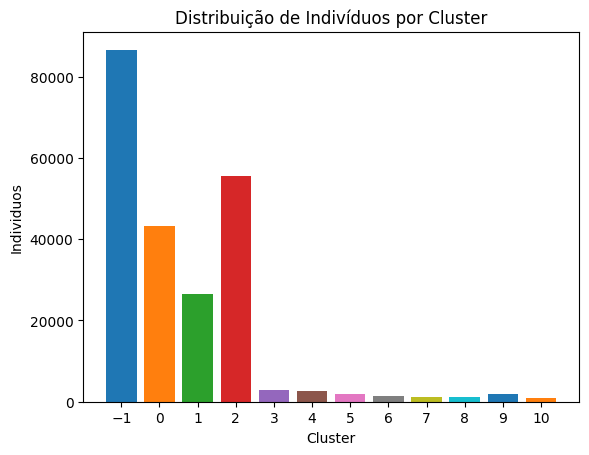

In [257]:
# Visualize a distribuição de indivíduos para cada cluster
for i in range(-1, len(sorted_cluster_stats) - 1):
  plt.bar(i, len(prepared_df[prepared_df['Cluster'] == i]))

plt.xlabel('Cluster')
plt.ylabel('Individuos')
plt.xlim(-2, 11)
plt.xticks(range(-1, len(sorted_cluster_stats) - 1))
plt.title('Distribuição de Indivíduos por Cluster')
plt.show()

### Análise Detalhada dos Clusters no Modelo DBSCAN

#### Nota Média e Desvio Padrão por Cluster

A análise das médias e desvios padrão das notas médias por cluster no modelo DBSCAN revela informações importantes sobre a distribuição e consistência das pontuações dos candidatos em cada grupo identificado. Vamos destacar alguns pontos-chave:

1. *Cluster 8 (Média: 669.69, Desvio Padrão: 66.81):*
   - Este cluster possui uma média relativamente alta e um desvio padrão moderado, sugerindo que os candidatos nesse grupo tendem a ter bom desempenho, com uma consistência razoável nas notas.

2. *Cluster 5 (Média: 496.23, Desvio Padrão: 71.90):*
   - Nota-se uma média inferior e um desvio um pouco mais alto. Este cluster pode incluir grupos de candidatos que tendem a ter um desempenho menor, com uma consistência razoável nas notas.

3. *Cluster -1 (Outliers, Média: 551.72, Desvio Padrão: 97.75):*
   - O cluster -1 é notavelmente grande e possui um desvio padrão elevado. Isso sugere que os individuos não puderam ser agrupados efetivamente, portanto, foram classificados como *outliers* pelo DBSCAN. O valor da média pode ser influenciada por outliers ou subgrupos distintos.

#### Quantidade de Candidatos por Cluster

A distribuição da quantidade de candidatos por cluster revela insights sobre a prevalência de grupos distintos no conjunto de dados. Destacamos alguns pontos:

1. *Cluster -1 (86,609 Candidatos):*
   - Este é o maior cluster e representa uma porção significativa dos candidatos. A grande quantidade pode indicar uma dificuldade do modelo em atribuir esses candidatos a clusters específicos, ou esses candidatos podem realmente formar um grupo diversificado.

2. *Cluster 5 (1,832 Candidatos) e Cluster 8 (1,076 Candidatos):*
   - Dois clusters com um número relativamente baixo de candidatos. Isso pode indicar a presença de um grupo mais específico ou uma característica única compartilhada por esses candidatos.

In [258]:
# Substitua 'seu_dataframe' pelo nome do seu dataframe

cluster_5_data = prepared_df[prepared_df['Cluster'] == 5]

print(len(cluster_5_data))

# Calcule as médias
means = cluster_5_data.mean()

# Calcule os desvios padrões
std_devs = cluster_5_data.std()

# Crie um novo dataframe com as médias e desvios padrões
cluster_5_stats = pd.concat([means, std_devs], axis=1)
cluster_5_stats.columns = ['Média', 'Desvio Padrão']

# Exiba as estatísticas para o cluster 5
print(cluster_5_stats)

1832
                    Média  Desvio Padrão
Q001             1.232533       0.467946
Q002             3.257642       0.577378
Q003             3.004367       0.065955
Q004             4.000000       0.000000
Q006             2.498908       1.765003
NU_NOTA_MEDIA  496.231281      71.901229
Cluster          5.000000       0.000000


### Análise Detalhada do Cluster 5

1. *Escolaridade dos Pais (Q001 e Q002):*
   - *Q001 (Escolaridade do Pai):* A média de 1.23 indica que, em média, os pais têm escolaridade entre "Nunca estudou" (A) e "Não completou a 4ª série/5º ano do Ensino Fundamental" (B).
   - *Q002 (Escolaridade da Mãe):* A média de 3.26 sugere uma escolaridade entre "Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio" (D) e "Completou o Ensino Médio, mas não completou a Faculdade" (E).

2. *Ocupação dos Pais (Q003 e Q004):*
   - *Q003 (Ocupação do Pai):* A média de 3.00 indica que a ocupação do pai está mais próxima do "Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, etc.".
   - *Q004 (Ocupação da Mãe):* A pontuação média (4.00) indica que a ocupação da mãe está associada ao "Grupo 4: Professora, técnica, policial, etc.".

3. *Renda Mensal da Família (Q006):*
   - A média de 2.50 sugere uma faixa de renda entre (B) "Até R$ 1.212,00" e (C) "De R$ 1.212,01 até R$ 1.818,00".

4. *Nota Média (NU_NOTA_MEDIA):*
   - A média da nota é de 496.23, com um desvio padrão de 71.90. Isso pode indicar uma variabilidade nas notas, mas a média está em linha considerada de baixa performance.

#### Observações Gerais:
- *Educação e Ocupação:* As informações sugerem um perfil de família onde os pais têm educação em níveis não muito elevados, com ocupações predominantemente associadas ao setor de serviços. A renda mensal reflete um padrão de vida entre o precário e o desfavorável a depender da quantidade de membro da família, especialmente se considerar o alto custo de vida dos grandes centros urbanos.
  
- *Notas Médias:* As notas médias, embora com alguma variabilidade, indicam um desempenho considerado de baixa performance, refletindo a influência negativa da educação e ambiente socioeconômico. Essa classificação de desempenho se dá pelo fato de que com esta nota média não é possível ingressar na grande maioria dos cursos de graduação em universidades públicas ou privadas com bolsa.

Essas análises detalhadas fornecem insights valiosos sobre as características específicas do Cluster 5, contribuindo para uma compreensão mais rica dos diferentes perfis socioeconômicos e acadêmicos presentes nos dados do ENEM 2022.

In [259]:
# Substitua 'seu_dataframe' pelo nome do seu dataframe

cluster_8_data = prepared_df[prepared_df['Cluster'] == 8]

print(len(cluster_8_data))

# Calcule as médias
means = cluster_8_data.mean()

# Calcule os desvios padrões
std_devs = cluster_8_data.std()

# Crie um novo dataframe com as médias e desvios padrões
cluster_8_stats = pd.concat([means, std_devs], axis=1)
cluster_8_stats.columns = ['Média', 'Desvio Padrão']

# Exiba as estatísticas para o cluster 8
print(cluster_8_stats)

1076
                    Média  Desvio Padrão
Q001             3.000000       0.000000
Q002             8.000000       0.000000
Q003             6.000000       0.000000
Q004             5.000000       0.000000
Q006            13.882900       1.484570
NU_NOTA_MEDIA  669.694064      66.810625
Cluster          8.000000       0.000000


### Análise Detalhada do Cluster 8

1. *Escolaridade dos Pais (Q001 e Q002)*
   - *Q001 (Escolaridade do Pai):* A pontuação média (3.00) indica que, em média, os pais possuem escolaridade "Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental." (D).
   - *Q002 (Escolaridade da Mãe):* A pontuação média (8.00) indica que os participantes informaram não saber a escolaridade da mãe, contudo, dado a ocupação classificada como (E), podemos ter um forte indicativo de um elevado índice de educação.

2. *Ocupação dos Pais (Q003 e Q004)*
   - *Q003 (Ocupação do Pai):* A pontuação média (6.00) indica que a ocupação do pai não foi classificada "Não sei" (F).
   - *Q004 (Ocupação da Mãe):* A pontuação média (5.00) sugere uma ocupação associada ao "Grupo 5: Médica, engenheira, dentista, etc." (E).

3. *Renda Mensal da Família (Q006)*
   - A média de 13.88 indica uma renda familiar considerável, possivelmente próxima à faixa de "De R$ 12.120,01 até R$ 14.544,00" (N).

4. *Nota Média (NU_NOTA_MEDIA)*
   - A média da nota é de 669.69, com um desvio padrão de 66.81. As notas estão em um nível mais elevado, indicando um desempenho acadêmico sólido.

#### Observações Gerais:
- *Educação e Ocupação:* Este cluster parece representar famílias com níveis de educação mais elevados e ocupações predominantemente associadas a setores profissionais qualificados e de alta remuneração. A renda familiar com certeza reflete uma situação socioeconômica mais sólida e confortável, desviando consideravelmente da média brasileira.

- *Notas Médias:* As notas médias consideravelmente mais altas sugerem um desempenho acadêmico robusto dentro deste cluster, indicando possíveis influências positivas de um ambiente educacional mais avançado e melhores condições socioeconômicas. Essa classificação de desempenho se dá pelo fato de que com esta nota média é possível ingressar na maioria dos cursos de graduação em universidades públicas ou privadas com bolsa, salvo cursos com alta concorrência e nas melhores universidades do país tal qual a UFMG.

Essas análises detalhadas fornecem insights específicos sobre as características do Cluster 8, enriquecendo a compreensão das diferentes dinâmicas socioeconômicas e acadêmicas presentes nos dados do ENEM 2022.

## Conclusões Finais do Projeto

### 1. Entendimento dos Dados:

- *Dados Gerais:*
  - O conjunto de dados do ENEM 2022 possui 300.000 entradas e 76 colunas, abrangendo informações demográficas, socioeconômicas e notas dos candidatos.
  - Diversas colunas apresentam dados faltantes, principalmente relacionadas às informações sobre a escola e algumas notas das provas.

- *Distribuição de Idades e Gênero:*
  - A maioria dos candidatos está concentrada nas faixas de idade mais jovens, com uma predominância de candidatas do sexo feminino.

- *Distribuição das Notas nas Provas:*
  - As médias das notas nas provas variam, e as correlações entre as diferentes provas indicam que candidatos que se saem bem em uma prova tendem a ter bom desempenho em outras.

- *Escolaridade dos Pais e Acesso à Internet:*
  - A distribuição da escolaridade dos pais revela uma predominância de níveis médios de escolaridade.
  - A maioria dos candidatos possui acesso à internet, mas uma parcela significativa indica não ter acesso.

### 2. Preparação de Dados:

- *Exclusão de Colunas com Muitos Valores Nulos:*
  - Colunas com alto percentual de valores nulos foram excluídas para melhorar a qualidade dos dados.
  
- *Classificação das Notas Médias:*
  - Foram definidas classificações para os candidatos com base nas notas médias, segmentando-os em grupos A, B, C, D, E, e F.

- *Remoção de Colunas de Notas:*
  - Colunas específicas de notas foram removidas, mantendo apenas a coluna de classificação das notas médias.

- *Transformação de Dados Categóricos e Normalização:*
  - Dados categóricos foram transformados em ordinais, e normalização Min-Max foi aplicada aos dados numéricos.

### 3. Modelagem com DBSCAN:

- *Seleção de Colunas Relevantes:*
  - Colunas relevantes foram selecionadas, incluindo informações demográficas, socioeconômicas e notas médias.

- *Aplicação do DBSCAN:*
  - O algoritmo DBSCAN foi aplicado iterativamente, ajustando os parâmetros 'eps' e 'min_samples' para encontrar uma quantidade razoável de clusters.

- *Métricas de Avaliação:*
  - Foram utilizadas métricas internas, como Índice Davies-Bouldin, Índice Calinski-Harabasz e Silhouette Score, para avaliar a qualidade dos clusters. Auxiliou no processo iterativo para melhor assertividade na escolha dos parâmetros.

- *Análise Detalhada dos Clusters:*
  - Clusters específicos foram analisados em detalhes, destacando características socioeconômicas e acadêmicas distintas.

#### Resultados da Avaliação do DBSCAN:

- *Índice Davies-Bouldin:*
  - 0.4693 (valor mais baixo indica melhor separação entre clusters).

- *Índice Calinski-Harabasz:*
  - 245256.39 (valor mais alto indica melhor separação entre clusters).

- *Silhouette Score:*
  - 0.4675 (valor mais alto indica melhor qualidade do agrupamento).

### 4. Conclusões Finais:

#### Cluster 8 (Alto Desempenho):

- Representa candidatos com alta escolaridade dos pais, ocupações associadas a setores profissionais qualificados, renda familiar elevada e desempenho acadêmico robusto.
- Esses candidatos, em maioria, podem se beneficiar da oportunidade de cursar cursos de graduação de forma gratuita nas melhores universidades do país.
- Grupo releva forte relação entre os parâmetros socioeconômicos e o desempenho positivo no exame ENEM. Essa relação é esperada, e concretiza uma premissa que indica que melhores condições e oportunidade de vida propiciam um melhor ambiente para o estudo e desenvolvimento intelectual, resultando em um melhor desempenho no Exame Nacional do Ensino Médio.

#### Cluster 5 (Baixo Desempenho):

- Agrupa candidatos com menor escolaridade dos pais, ocupações associadas ao setor de serviços, renda familiar mais limitada e desempenho acadêmico inferior.
- Dado o desempenho dos alunos, difícilmente conseguirão acessar as vagas das universidades públicas, mesmo sendo o grupo que mais carente de oportunidades de melhoria de vida.
- O grupo revela uma clara correlação entre os fatores socioeconômicos desfavoráveis e o desempenho mais baixo no exame ENEM. Essa associação destaca a importância de abordagens inclusivas e estratégias de suporte específicas para superar desafios enfrentados por estudantes em ambientes socioeconômicos menos favorecidos. A compreensão desses fatores é crucial para promover a equidade no acesso à educação de qualidade.
- Esses candidatos poderiam ser agraciados por iniciativas que visem proporcionar igualdade de acesso a recursos educacionais, para tornar o acesso a eduação democratizado para os grupos mais vulneráveis da sociedade.

#### Cluster -1 (Outliers):

- Representa uma grande proporção de candidatos para os quais o modelo não conseguiu atribuir a um cluster específico.
- Pode indicar a presença de subgrupos não capturados pelo DBSCAN ou complexidades na interação entre variáveis.
- Análises adicionais são necessárias para entender melhor esses casos e ajustar o modelo, se necessário.
- Dada a grande quantidade de candidatos neste grupo, inferimos uma complexidade intrínseca ao segmentar grande parte dos participantes.

#### Avaliação do Modelo:

- O Índice Davies-Bouldin (DBI) e o Índice Calinski-Harabasz indicam uma separação razoável entre clusters e uma qualidade de agrupamento aceitável.
- O Silhouette Score, sendo alto, confirma a boa separação e coesão dos clusters.
- No entanto, é importante notar que métricas isoladas nem sempre capturam a complexidade dos dados, e interpretação visual e contextualizada dos clusters é essencial.

#### Relação com Objetivos Iniciais:

- Os clusters identificados corroboram a relação entre variáveis socioeconômicas e o desempenho acadêmico, alinhando-se com os objetivos do projeto.
- A capacidade do modelo de distinguir grupos com base em fatores socioeconômicos sugere a importância dessas variáveis na análise do desempenho dos candidatos no ENEM.

#### Processo Iterativo:

**A grande maioria do processo iterativo foi realizado sem o auxílio direto do ChatGPT. Isso ocorreu porque em instâncias muito grandes do Chat ele perdeu grande parte do contexto e houve um aumento no número de alucinações e delírios. Estes fatos acabaram por dificultar o entendimento do processo, optamos então por abandonar a utilização nesta etapa de otimização dos parâmetros do modelo.**

- *Exploração Adicional dos Clusters:*
  - Investigar mais a fundo os perfis dentro de cada cluster para entender nuances e identificar características distintivas não inicialmente consideradas.

- *Comparação com Outros Algoritmos de Clustering:*
  - Aplicar algoritmos como K-Means, Hierarchical Clustering, e Spectral Clustering para comparar resultados e avaliar a robustez das descobertas. Por conta da alta dimensionalidade e o fato de não conhecer as classificações reais, consideramos que o algoritmo DBSCAN é mais aderente ao contexto, além de apresentar os melhores resultados para as métricas de avaliação.

- *Investigação mais Profunda sobre Fatores Socioeconômicos:*
  - Analisar variáveis adicionais, como acesso a recursos educacionais, participação em programas sociais, para uma compreensão mais holística dos determinantes do desempenho e melhor entendimento dos clusters.

- *Feedback e Melhoria Contínua:*
  - Incorporar feedback de especialistas em educação e ajustar o modelo conforme necessário, garantindo uma abordagem iterativa para melhorar a precisão e a utilidade das conclusões.

A análise detalhada dos clusters, a avaliação criteriosa do modelo e os próximos passos propostos fornecem uma base sólida para continuar explorando a complexa interação entre fatores socioeconômicos e o desempenho acadêmico no contexto do ENEM 2022.